In [2]:
# Install necessary libraries if you don't have them installed
# pip install pandas scikit-learn

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


In [6]:
# Load the CSV files
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Check the first few rows of each dataset to ensure correct loading
customers_df.head(), products_df.head(), transactions_df.head()


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [7]:
# Merge the customer data with transaction data using the CustomerID
customer_transactions = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

# Check the merged dataset
customer_transactions.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


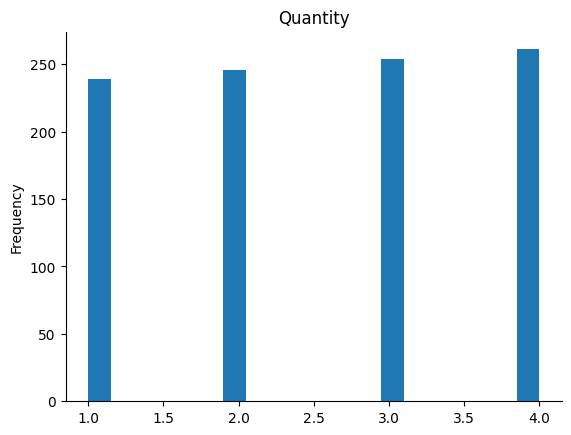

In [9]:
# @title Quantity

from matplotlib import pyplot as plt
customer_transactions['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

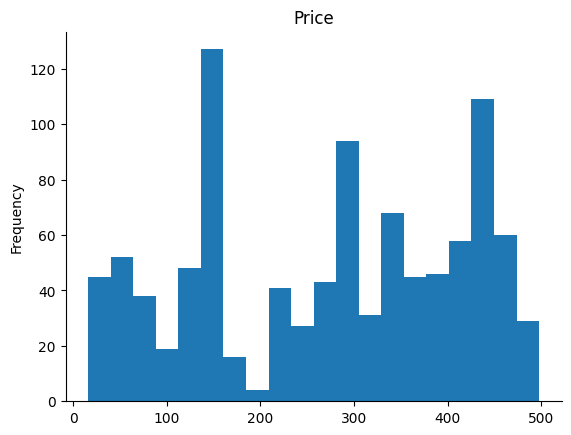

In [8]:
# @title Price

from matplotlib import pyplot as plt
customer_transactions['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
customer_transactions['TotalValue'] = customer_transactions['Quantity'] * customer_transactions['Price']
customer_spending = customer_transactions.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    avg_purchase_value=('TotalValue', 'mean')
).reset_index()

In [11]:

# Check customer spending data
customer_spending.head()

,CustomerID,total_spending,avg_purchase_value
0,C0001,3354.52,670.904
1,C0002,1862.74,465.685
2,C0003,2725.38,681.345
3,C0004,5354.88,669.360
4,C0005,2034.24,678.080


In [15]:
customer_transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [17]:
print(customer_transactions.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate'],
      dtype='object')


In [18]:
# Merge the Products DataFrame with Transactions DataFrame
customer_transactions = pd.merge(transactions_df, products_df[['ProductID', 'Category']], on='ProductID', how='left')

# Verify if the merge was successful and check the new columns
print(customer_transactions.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     Category  
0      300.68  300.68  Electronics  
1      300.68  300.68  Electronics  
2      300.68  300.68  Electronics  
3      601.36  300.68  Electronics  
4      902.04  300.68  Electronics  


In [21]:
# Find most purchased categories per customer
category_purchases = customer_transactions.groupby(['CustomerID', 'Category']).agg(
    purchase_count=('Quantity', 'sum')
).reset_index()

# Find the top category for each customer
top_categories = category_purchases.loc[category_purchases.groupby('CustomerID')['purchase_count'].idxmax()]
top_categories = top_categories[['CustomerID', 'Category']]

# Check top categories
top_categories.head()


,CustomerID,Category
1,C0001,Electronics
4,C0002,Home Decor
7,C0003,Home Decor
10,C0004,Home Decor
11,C0005,Electronics


In [22]:

customer_profiles = pd.merge(customer_spending, top_categories, on='CustomerID', how='left')

# Check the customer profile data
customer_profiles.head()


,CustomerID,total_spending,avg_purchase_value,Category
0,C0001,3354.52,670.904,Electronics
1,C0002,1862.74,465.685,Home Decor
2,C0003,2725.38,681.345,Home Decor
3,C0004,5354.88,669.360,Home Decor
4,C0005,2034.24,678.080,Electronics


In [23]:
# Normalize features for similarity calculation
scaler = StandardScaler()
numerical_features = ['total_spending', 'avg_purchase_value']
customer_profiles[numerical_features] = scaler.fit_transform(customer_profiles[numerical_features])

# Check the normalized data
customer_profiles.head()


,CustomerID,total_spending,avg_purchase_value,Category
0,C0001,-0.061701,-0.070263,Electronics
1,C0002,-0.877744,-0.934933,Home Decor
2,C0003,-0.405857,-0.026271,Home Decor
3,C0004,1.032547,-0.076769,Home Decor
4,C0005,-0.783929,-0.040028,Electronics


In [24]:
# Convert the top category to a numerical feature (e.g., one-hot encoding)
category_dummies = pd.get_dummies(customer_profiles['Category'], prefix='Category')
customer_profiles = pd.concat([customer_profiles, category_dummies], axis=1)

# Drop the original 'Category' column since we now have dummies
customer_profiles = customer_profiles.drop('Category', axis=1)

# Calculate the cosine similarity between customers based on their profiles
similarity_matrix = cosine_similarity(customer_profiles.drop('CustomerID', axis=1))

# Check the similarity matrix (only the first few rows)
similarity_matrix[:5, :5]


array([[ 1.        ,  0.07337897,  0.02479857, -0.04033614,  0.82327912],
       [ 0.07337897,  1.        ,  0.78653306,  0.07068459,  0.35093738],
       [ 0.02479857,  0.78653306,  1.        ,  0.37513899,  0.23259646],
       [-0.04033614,  0.07068459,  0.37513899,  1.        , -0.44065061],
       [ 0.82327912,  0.35093738,  0.23259646, -0.44065061,  1.        ]])

In [25]:
# Create a dictionary to store recommendations
lookalikes = {}

# Iterate through the first 20 customers (C0001 to C0020)
for i in range(20):
    # Get similarity scores for the current customer (i-th row)
    similarity_scores = similarity_matrix[i]

    # Get the top 3 most similar customers (exclude the customer themselves)
    top_3_indices = similarity_scores.argsort()[-4:-1][::-1]  # Exclude the customer itself

    # Get the corresponding customer IDs and similarity scores
    top_3_customers = customer_profiles['CustomerID'].iloc[top_3_indices].values
    top_3_scores = similarity_scores[top_3_indices]

    # Store in dictionary
    lookalikes[customer_profiles['CustomerID'].iloc[i]] = list(zip(top_3_customers, top_3_scores))

# Check the first few lookalikes
lookalikes


{'C0001': [('C0154', 0.9595615112973378),
  ('C0072', 0.9460991836965436),
  ('C0190', 0.9415512944743754)],
 'C0002': [('C0199', 0.9982519297322439),
  ('C0025', 0.9937124924463774),
  ('C0071', 0.9926376570420791)],
 'C0003': [('C0178', 0.9998418965641266),
  ('C0133', 0.9846174950415173),
  ('C0052', 0.9715902455224035)],
 'C0004': [('C0108', 0.9856527831633348),
  ('C0012', 0.9725174483330993),
  ('C0113', 0.9601110943114417)],
 'C0005': [('C0197', 0.9931801105957048),
  ('C0035', 0.9695707118027512),
  ('C0130', 0.9314480229053315)],
 'C0006': [('C0117', 0.9969924825194125),
  ('C0185', 0.9693019976697995),
  ('C0171', 0.9654637484576227)],
 'C0007': [('C0085', 0.9998136442118711),
  ('C0120', 0.9927429995803534),
  ('C0140', 0.9724340029291508)],
 'C0008': [('C0098', 0.92168530207591),
  ('C0109', 0.9018166572216607),
  ('C0034', 0.8781753661157327)],
 'C0009': [('C0077', 0.9998236333864945),
  ('C0032', 0.9978760944152656),
  ('C0033', 0.9931666752828809)],
 'C0010': [('C0029', 

In [26]:
# Convert the dictionary into a DataFrame
lookalikes_list = []
for cust_id, recommendations in lookalikes.items():
    for rec in recommendations:
        lookalikes_list.append([cust_id, rec[0], rec[1]])

lookalikes_df = pd.DataFrame(lookalikes_list, columns=['cust_id', 'lookalike_cust_id', 'similarity_score'])

# Save to CSV
lookalikes_df.to_csv('Firstname_Lastname_Lookalike.csv', index=False)

# Check the saved file
lookalikes_df.head()


,cust_id,lookalike_cust_id,similarity_score
0,C0001,C0154,0.959562
1,C0001,C0072,0.946099
2,C0001,C0190,0.941551
3,C0002,C0199,0.998252
4,C0002,C0025,0.993712


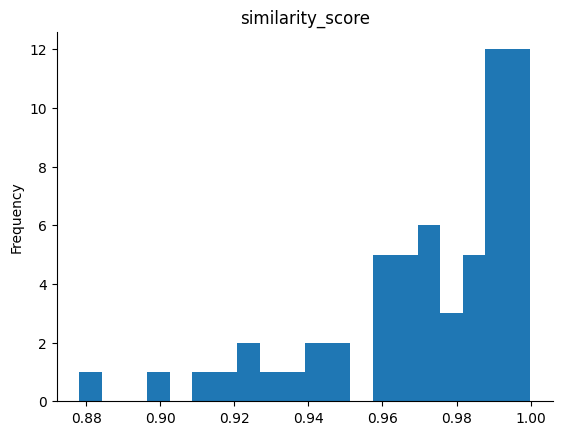

In [27]:
# @title similarity_score

from matplotlib import pyplot as plt
lookalikes_df['similarity_score'].plot(kind='hist', bins=20, title='similarity_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [31]:
# Save category_purchases DataFrame to a CSV file
category_purchases.to_csv('Sreshta_Lookalike.csv', index=False)


Data Preprocessing: We loaded and merged the data from different sources (customers, transactions) and created customer profiles based on their spending behavior and most purchased categories.

Feature Engineering: We calculated new features like total spending and average purchase value, which are important for understanding customer behavior.

Similarity Calculation: We used cosine similarity to compare customers and find the ones with the most similar profiles.

Top 3 Lookalikes: We identified the top 3 most similar customers for each customer based on the calculated similarity scores.

Saving Results: The final recommendations were saved in a CSV file for easy use.